# Load DPC data files and make top level statistics

In [3]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

## (1) load pickle file duopoly_feedback.data
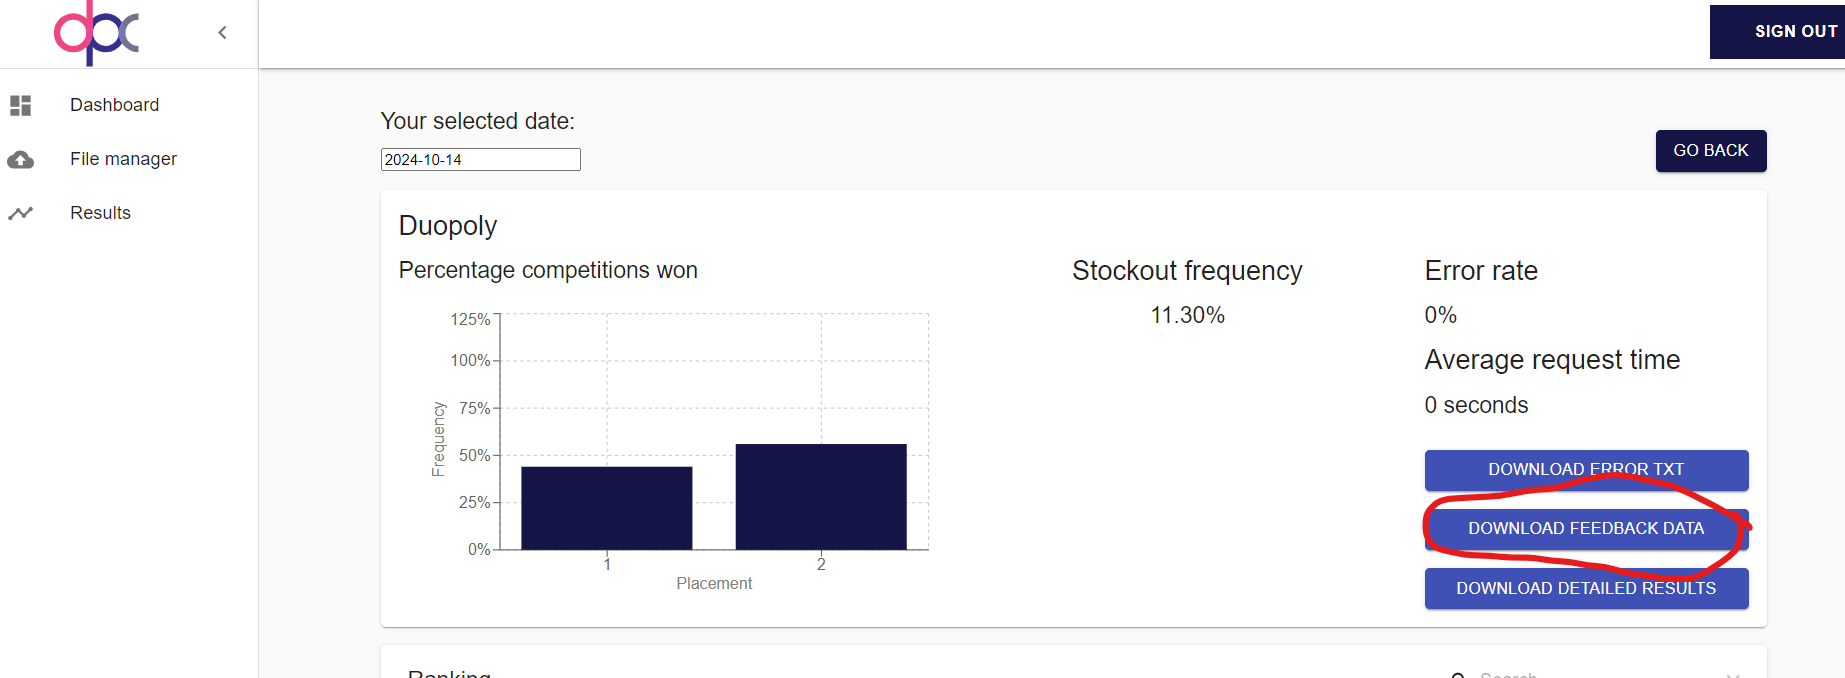

In [4]:
with open('duopoly_feedback.data', 'rb') as handle:
    feedback = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'duopoly_feedback.data'

In [ ]:
feedback.keys()

NameError: name 'feedback' is not defined

In [5]:
feedback['history'].head(10)

NameError: name 'feedback' is not defined

In [ ]:
feedback['current_simulation']

In [ ]:
feedback['cumulative_revenue_current_selling_season']

## (2) load duopoly_competition_details.csv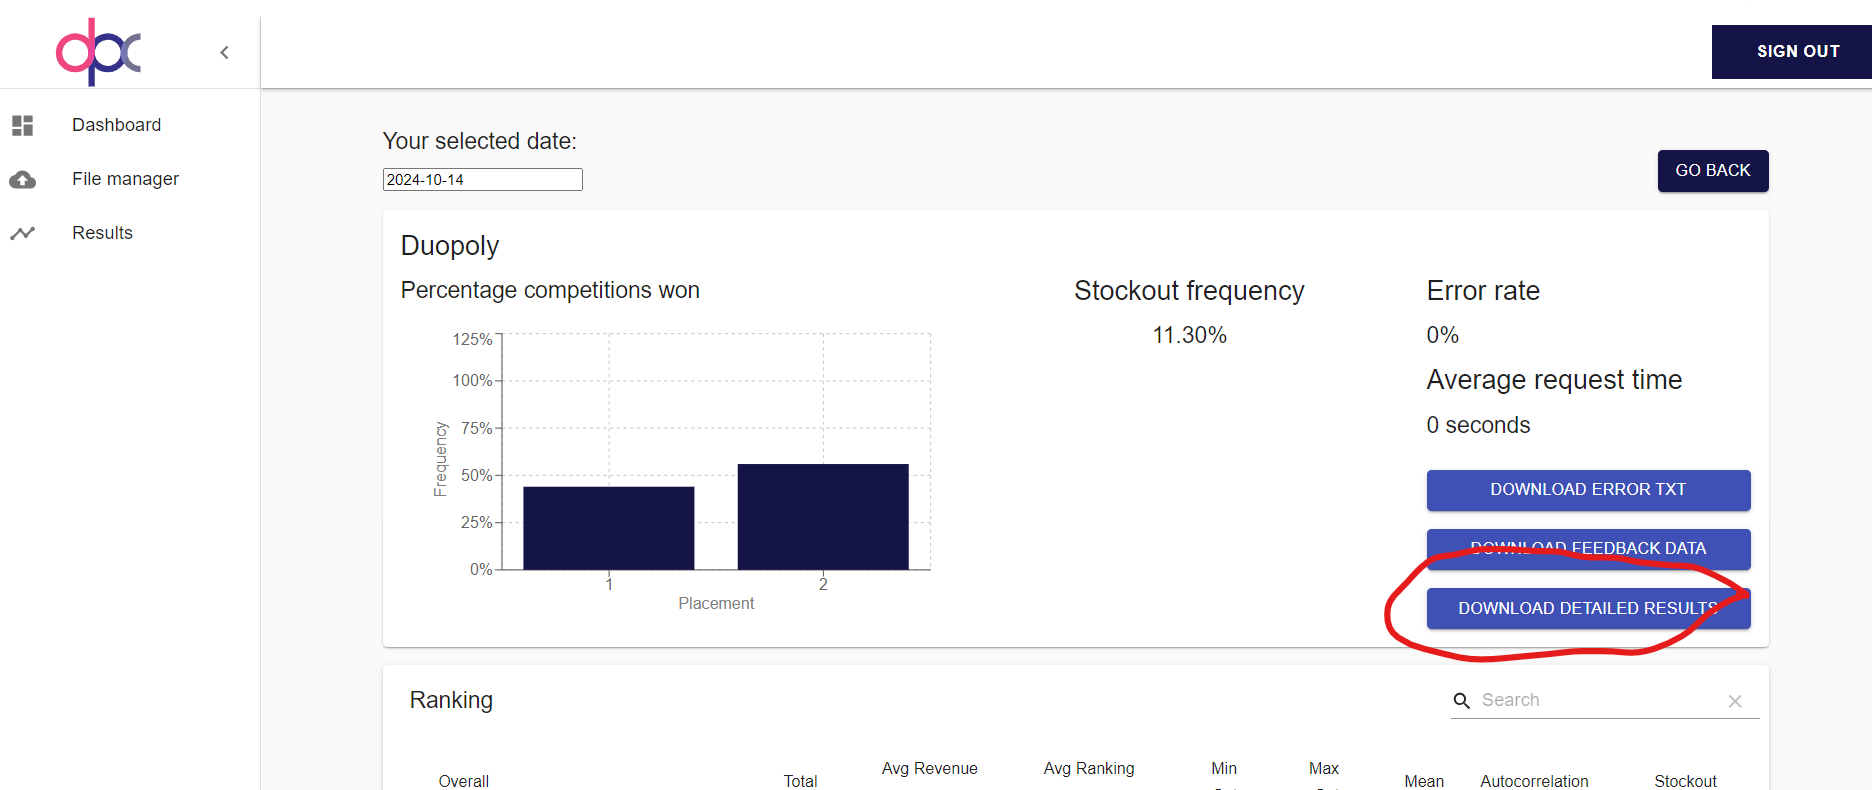

In [6]:
df_comp_details = pd.read_csv('15.11.2025/Quentin/duopoly_competition_details.csv')
df_comp_details.head(10)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors
0,3eieuu,1,1,DidacticFlounder,43.5,35.0,0,True,0.0,NaN
1,3eieuu,1,2,DidacticFlounder,41.3,28.0,1,True,0.0,NaN
2,3eieuu,1,3,DidacticFlounder,39.3,26.6,1,True,0.0,NaN
3,3eieuu,1,4,DidacticFlounder,37.3,28.8,1,True,0.0,NaN
4,3eieuu,1,5,DidacticFlounder,29.6,32.6,0,True,0.0,NaN
5,3eieuu,1,6,DidacticFlounder,28.1,33.7,0,True,0.0,NaN
6,3eieuu,1,7,DidacticFlounder,26.7,33.7,0,True,0.0,NaN
7,3eieuu,1,8,DidacticFlounder,25.4,32.2,0,True,0.0,NaN
8,3eieuu,1,9,DidacticFlounder,24.1,29.7,2,True,0.0,NaN
9,3eieuu,1,10,DidacticFlounder,32.4,30.6,1,True,0.0,NaN


In [7]:
df_comp_details.groupby('competitor_id').agg({
    'competition_id' : 'nunique',
    'selling_season' : ['max', 'count']
})

competition_id selling_season       
                         nunique            max  count
competitor_id                                         
DidacticFlounder               2            100  20000
ImposingCrocodile              2            100  20000

### create unique selling_season_id

In [8]:
df_comp_details['unique_selling_season_key'] = df_comp_details.apply(lambda r:
                                "%s_%s" % (r.competition_id,r.selling_season), axis=1)

df_comp_details.head(3)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key
0,3eieuu,1,1,DidacticFlounder,43.5,35.0,0,True,0.0,NaN,3eieuu_1
1,3eieuu,1,2,DidacticFlounder,41.3,28.0,1,True,0.0,NaN,3eieuu_1
2,3eieuu,1,3,DidacticFlounder,39.3,26.6,1,True,0.0,NaN,3eieuu_1


#### show revenue distribution over all selling seasons

In [9]:
df_comp_details['revenue'] = df_comp_details['demand'] * df_comp_details['price']

In [10]:
dfx_rev = df_comp_details.groupby('unique_selling_season_key').agg({
    'revenue' : 'sum'
}).reset_index()


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

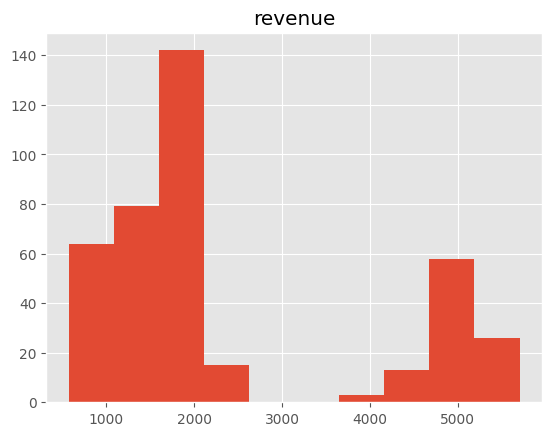

In [11]:
dfx_rev.hist()

In [12]:
dfx_rev_top = dfx_rev.sort_values('revenue', ascending=False)

dfx_rev_top.head(10)

,unique_selling_season_key,revenue
101,3fVyNT_10,5706.4
122,3fVyNT_29,5703.3
199,3fVyNT_99,5603.9
169,3fVyNT_71,5598.1
187,3fVyNT_88,5577.6
188,3fVyNT_89,5540.9
158,3fVyNT_61,5526.2
192,3fVyNT_92,5513.6
142,3fVyNT_47,5503.4
184,3fVyNT_85,5502.3


### visualize the results of one selling season

In [53]:
id = dfx_rev_top['unique_selling_season_key'].values[-1]

df_aux = df_comp_details[df_comp_details.unique_selling_season_key==id]
df_aux.tail(10)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue
31090,jd9PL7,11,91,ImposingCrocodile,45.4,6.6,0,True,0.0,NaN,jd9PL7_11,0.0
31091,jd9PL7,11,92,ImposingCrocodile,44.5,6.8,0,True,0.0,NaN,jd9PL7_11,0.0
31092,jd9PL7,11,93,ImposingCrocodile,43.4,7.0,0,True,0.0,NaN,jd9PL7_11,0.0
31093,jd9PL7,11,94,ImposingCrocodile,54.1,7.2,0,True,0.0,NaN,jd9PL7_11,0.0
31094,jd9PL7,11,95,ImposingCrocodile,69.8,7.4,0,True,0.0,NaN,jd9PL7_11,0.0
31095,jd9PL7,11,96,ImposingCrocodile,55.5,7.5,0,True,0.0,NaN,jd9PL7_11,0.0
31096,jd9PL7,11,97,ImposingCrocodile,42.1,7.6,0,True,0.0,NaN,jd9PL7_11,0.0
31097,jd9PL7,11,98,ImposingCrocodile,44.5,7.7,0,True,0.0,NaN,jd9PL7_11,0.0
31098,jd9PL7,11,99,ImposingCrocodile,52.6,7.7,0,True,0.0,NaN,jd9PL7_11,0.0
31099,jd9PL7,11,100,ImposingCrocodile,43.2,7.8,0,True,0.0,NaN,jd9PL7_11,0.0


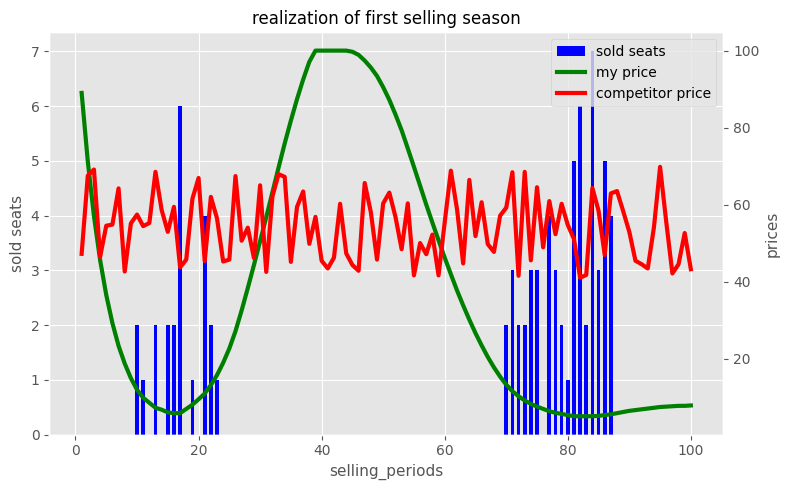

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(df_aux.selling_period, df_aux.demand, color='b', width=0.6, align='center', label = 'sold seats')
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("sold seats" , size=11)

ax_2 = ax.twinx()
ax_2.grid(False)
ax_2.plot(df_aux.selling_period, df_aux.price, color='g', linestyle='-', linewidth=3, label = 'my price')
ax_2.plot(df_aux.selling_period, df_aux.price_competitor, color='r', linestyle='-', linewidth=3, label = 'competitor price')
ax_2.tick_params(axis="both", labelsize=10)
ax_2.set_ylabel("prices" , size=11)

ax.tick_params(axis="both", labelsize=10)
ax.set_title("realization of first selling season", size=12)

# legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_2.get_legend_handles_labels()
ax_2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

# Plot the Capacity Utilization Curve

**capacity utilization = sold quantity / capacity**

In [56]:
df_aux['cum_demand'] = df_aux['demand'].cumsum()
df_aux['cap_util'] = round(df_aux[ 'cum_demand'] / 80 ,2)
df_aux.head(15)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue,cum_demand,cap_util
31000,jd9PL7,11,1,ImposingCrocodile,47.2,89.0,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31001,jd9PL7,11,2,ImposingCrocodile,67.5,71.2,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31002,jd9PL7,11,3,ImposingCrocodile,69.1,57.0,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31003,jd9PL7,11,4,ImposingCrocodile,46.4,45.6,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31004,jd9PL7,11,5,ImposingCrocodile,54.5,36.5,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31005,jd9PL7,11,6,ImposingCrocodile,54.8,29.2,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31006,jd9PL7,11,7,ImposingCrocodile,64.2,23.3,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31007,jd9PL7,11,8,ImposingCrocodile,42.6,18.7,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31008,jd9PL7,11,9,ImposingCrocodile,55.1,14.9,0,True,0.0,NaN,jd9PL7_11,0.0,0,0.00
31009,jd9PL7,11,10,ImposingCrocodile,57.4,11.9,2,True,0.0,NaN,jd9PL7_11,23.8,2,0.02


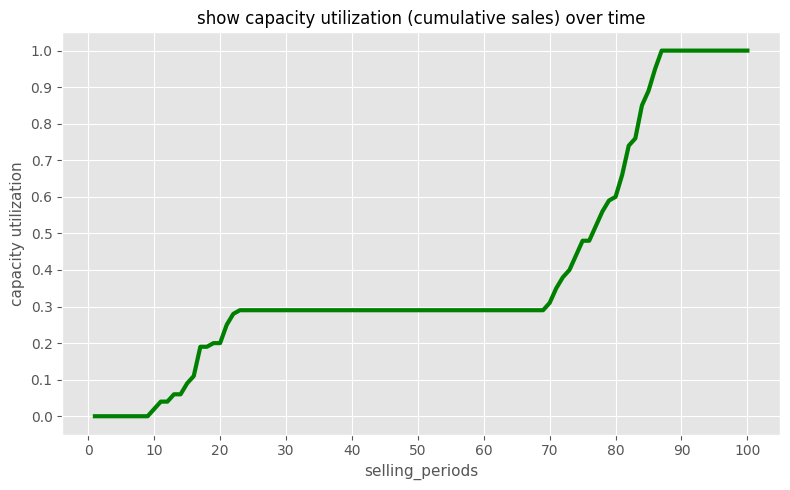

In [16]:
fig, ax = plt.subplots(figsize=(8,5))

# ax.plot(df_aux.selling_period, df_aux.cum_demand, color='b', 
#        width=0.6, align='center', label = 'sold seats')
ax.plot(df_aux.selling_period, df_aux.cap_util, color='g', 
        linestyle='-', linewidth=3, label = 'capacity utilization')
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("show capacity utilization (cumulative sales) over time", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

In [18]:
df_comp_details

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue
0,3eieuu,1,1,DidacticFlounder,43.5,35.0,0,True,0.0,NaN,3eieuu_1,0.0
1,3eieuu,1,2,DidacticFlounder,41.3,28.0,1,True,0.0,NaN,3eieuu_1,28.0
2,3eieuu,1,3,DidacticFlounder,39.3,26.6,1,True,0.0,NaN,3eieuu_1,26.6
3,3eieuu,1,4,DidacticFlounder,37.3,28.8,1,True,0.0,NaN,3eieuu_1,28.8
4,3eieuu,1,5,DidacticFlounder,29.6,32.6,0,True,0.0,NaN,3eieuu_1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,jd9PL7,100,96,ImposingCrocodile,54.5,5.0,5,True,0.0,NaN,jd9PL7_100,25.0
39996,jd9PL7,100,97,ImposingCrocodile,57.1,5.0,0,True,0.0,NaN,jd9PL7_100,0.0
39997,jd9PL7,100,98,ImposingCrocodile,68.0,5.0,2,True,0.0,NaN,jd9PL7_100,10.0
39998,jd9PL7,100,99,ImposingCrocodile,63.2,5.1,0,True,0.0,NaN,jd9PL7_100,0.0


In [ ]:
def state_to_features(state):
    """
    Transforme un état brut en dictionnaire de features pour RIVER.
    L'entrée 'state' peut être un dict, un objet, etc.
    """
    features = {}

    # Exemples génériques de transformations :
    features["season"] = state.get("season", 0)
    features["goal_diff"] = state.get("goal_difference", 0)
    features["ranking"] = state.get("ranking", 0)
    features["opponent_ranking"] = state.get("opponent_ranking", 0)

    # Exemple : extraire des features d’un historique
    form = state.get("team_form", [])
    if form:
        features["form_sum"] = sum(form)
        features["form_last"] = form[-1]
        features["form_wins"] = len([x for x in form if x == 2])
    else:
        features["form_sum"] = 0
        features["form_last"] = 0
        features["form_wins"] = 0

    return features


In [57]:
df_comp = df_comp_details[df_comp_details['competition_id']=="jd9PL7"]

from river import linear_model, metrics, preprocessing, optim

# Standardisation + régression linéaire avec régularisation L2
model = (
    preprocessing.StandardScaler() |
    linear_model.LinearRegression(l2=0.01, optimizer=optim.SGD(0.01))
)
metric = metrics.MAE()

df_comp_train = df_comp[df_comp['selling_season']<=20]
df_comp_test = df_comp[df_comp['selling_season']>20]

history = {'price_self' : [], 'price_competitor' : []}

for index, row in df_comp_train.iterrows():
    x = {
        'selling_period': row['selling_period'],
        'price_competitor_lag1': history['price_competitor'][-1] if row['selling_period']>1 else 0.0,
        'price_self_lag1': history['price_self'][-1] if row['selling_period']>1 else 0.0,
        # 'price_competitor_lag2': history['price_competitor'][-2] if row['selling_period']>2 else 0.0,
    }
    y = row['price_competitor']
    
    # Prédiction avant apprentissage
    y_pred = model.predict_one(x)

    # Mise à jour de la métrique
    if y_pred is not None:
        metric.update(y, y_pred)

    # Apprentissage online
    model.learn_one(x, y)

    # Mettre à jour l'historique pour la prochaine période
    history["price_self"].append(row['price'])
    history["price_competitor"].append(row['price_competitor'])

print(f"Erreur absolue moyenne cumulée {metric.get():.4f}")

Erreur absolue moyenne cumulée 8.4933


In [58]:
history_test = {'price_self' : [], 'price_competitor' : []}
results = []
reals = []

for index, row in df_comp_test.iterrows():
    x = {
        'selling_period': row['selling_period'],
        'price_competitor_lag1': history_test['price_competitor'][-1] if row['selling_period']>1 else 0,
        'price_self_lag1': history_test['price_self'][-1] if row['selling_period']>1 else 0,
        # 'price_competitor_lag2': history_test['price_competitor'][-2] if row['selling_period']>2 else 0,
    }
    y = row['price_competitor']
    reals.append(y)
    # Prédiction avant apprentissage
    y_pred = model.predict_one(x)
    results.append(y_pred)

    # Mettre à jour l'historique pour la prochaine période
    history_test["price_self"].append(row['price'])
    history_test["price_competitor"].append(row['price_competitor'])

df_results = pd.DataFrame({
    'real_price_competitor' : reals,
    'pred_price_competitor' : results
})
df_results.head(100)

,real_price_competitor,pred_price_competitor
0,59.5,61.535852
1,61.8,59.234665
2,54.6,58.030375
3,40.2,58.095760
4,65.5,59.135243
...,...,...
95,43.4,54.735352
96,55.0,54.537904
97,50.0,53.188150
98,65.9,53.742435


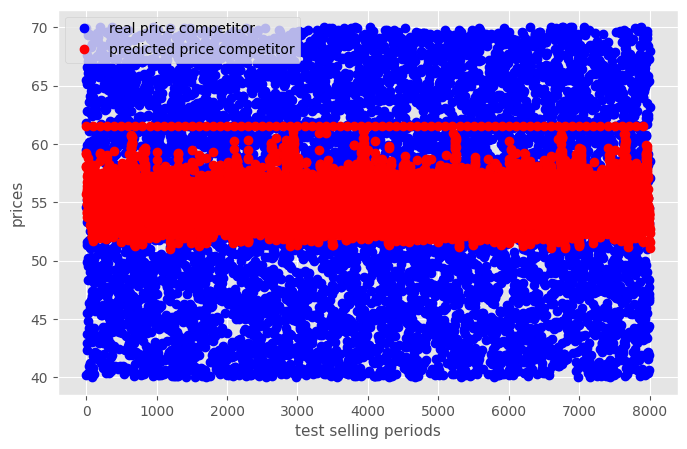

In [59]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(df_results.index, df_results['real_price_competitor'], 'bo', label = 'real price competitor')
ax.plot(df_results.index, df_results['pred_price_competitor'], 'ro', label = 'predicted price competitor')
ax.set_xlabel('test selling periods', size=11)
ax.set_ylabel("prices" , size=11)
ax.legend()
plt.show()

In [60]:
# Accéder au modèle final dans le pipeline
linreg = model[-1]  # ou model.steps[-1][1]

# Coefficients (poids des features)
print("Coefficients :")
for feature, coef in linreg.weights.items():
    print(f"{feature}: {coef:.4f}")

# Interception (bias)
print(f"Intercept: {linreg.intercept:.4f}")

Coefficients :
selling_period: -0.8605
price_competitor_lag1: -1.1793
price_self_lag1: 0.8846
Intercept: 55.1264


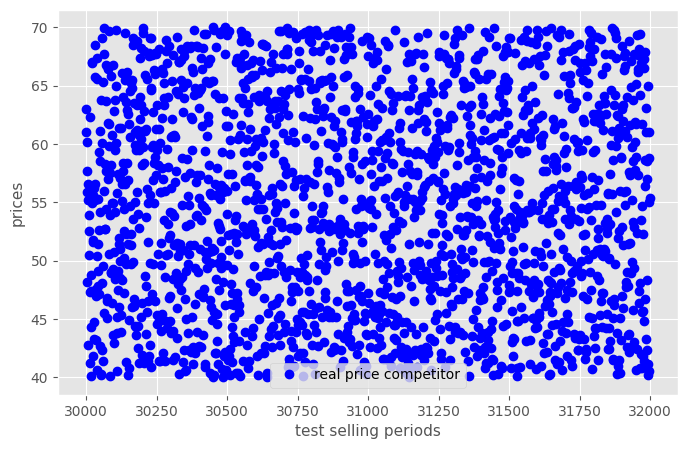

In [61]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(df_comp_train.index, df_comp_train['price_competitor'], 'bo', label = 'real price competitor')
ax.set_xlabel('test selling periods', size=11)
ax.set_ylabel("prices" , size=11)
ax.legend()
plt.show()